In [1]:
library(seqinr)
library(adegenet)
library(ape)
library(ggtree)
library(DECIPHER)
library(viridis)
library(ggplot2)

Loading required package: ade4


   /// adegenet 2.1.10 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




Attaching package: 'ape'


The following objects are masked from 'package:seqinr':

    as.alignment, consensus


ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:1

In [2]:
# load the sequences from the file
# change "DNA" to "RNA" or "AA" if necessary
seqs <- readDNAStringSet("Amanita.txt", format = "fasta")
seqs

DNAStringSet object of length 15:
     width seq                                              names               
 [1]   626 GGAAGTAAAAGTCGTAACAAGGT...AATTTGACCAACTTGACCTCAA NR_164607.1 Amani...
 [2]   625 GGAAGTAAAAGTCGTAACAAGGT...AATTTGACCAACTTGACCTCAA NR_164606.1 Amani...
 [3]   639 ATCATTACTGAACGAATTGGGTG...TGACCTCAAATCAGGTAGGACT NR_164493.1 Amani...
 [4]   687 AAGGATCATTATTGGAATGAAAT...AACTGCGAGTGAAGCGGGAAAA NR_119968.1 Amani...
 [5]   646 TCCGTAGGTGAACCTGCGGAAGG...AAGCATATCAATAAGCGGAGGA NR_119715.1 Amani...
 ...   ... ...
[11]   720 GGAAGTAAAAGTCGTAACAAGGT...AAGCATATCAATAAGCGGAGGA NR_119389.1 Amani...
[12]   713 GGAAGTAAAAGTCGTAACAAGGT...AAGCATATCAATAAGCGGAGGA NR_119388.1 Amani...
[13]   730 GGAAGTAAAAGTCGTAACAAGGT...AAGCATATCAATAAGCGGAGGA NR_119387.1 Amani...
[14]   563 GGTTTCCGTAGGTGAACCTGCGG...AAAAAAAAGACTTTCAGTCATG NR_159596.1 Amani...
[15]   540 TAAAAGTCGTAACAAGGTTTCCG...CAGCTTCTCCTTTTAAAATACC NR_159595.1 Amani...

In [3]:
# nucleotide sequences need to be in the same orientation
# if they are not, then they can be reoriented (optional)
seqs <- OrientNucleotides(seqs)

# perform the alignment
aligned <- AlignSeqs(seqs)


Time difference of 0.07 secs
Determining distance matrix based on shared 9-mers:

Time difference of 0.02 secs

Clustering into groups by similarity:

Time difference of 0.01 secs

Aligning Sequences:

Time difference of 0.14 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.01 secs

Reclustering into groups by similarity:

Time difference of 0.04 secs

Realigning Sequences:

Time difference of 0.1 secs

Iteration 2 of 2:

Determining distance matrix based on alignment:

Time difference of 0.01 secs

Reclustering into groups by similarity:

Time difference of 0.01 secs

Realigning Sequences:

Time difference of 0.01 secs

Refining the alignment:

Time difference of 0.11 secs



In [4]:
# view the alignment in a browser (optional)
BrowseSeqs(aligned, highlight=0)

# write the alignment to a new FASTA file
writeXStringSet(aligned,
                file ="new_aligned.fasta")

In [5]:
# read in the aligned data
dna <- read.alignment("new_aligned.fasta", format = "fasta")

# create a distance matrix for the alignment 
D <- dist.alignment(dna, matrix = "similarity")

NULL

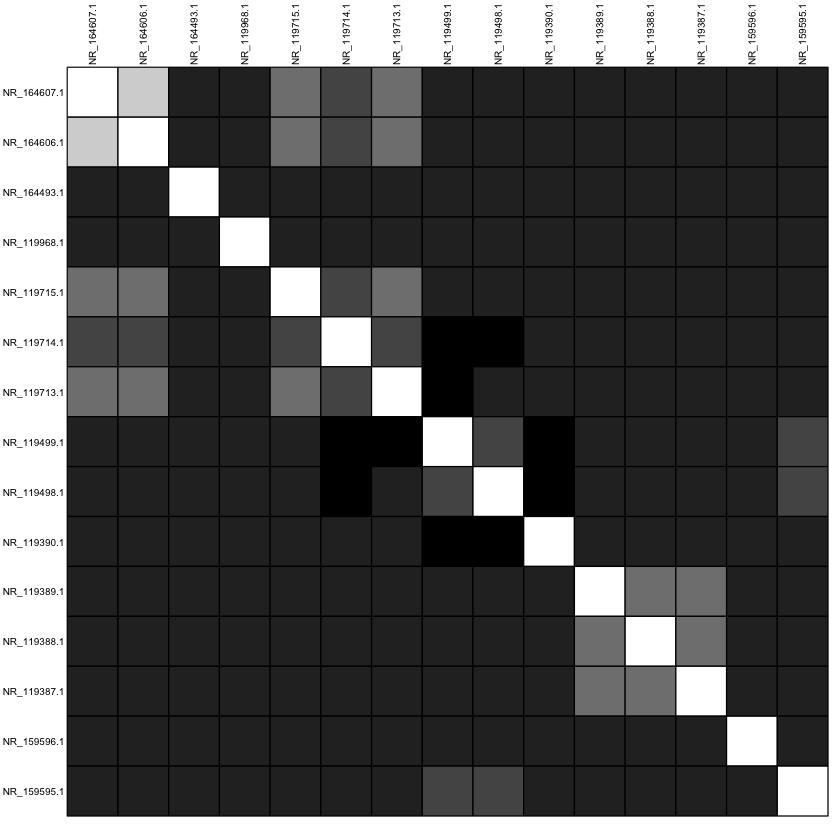

In [6]:
temp <- as.data.frame(as.matrix(D))
table.paint(temp, cleg = 0, clabel.row = .5, clabel.col = .5) +
  scale_color_viridis() #darker shades of gray mean a larger distance # you can also make cool color plots but they're much more complicated because they use the image() function


In [7]:
# we can start to see a pattern because the data is ordered by year, 
# but we can't really make any conclusions yet

tre <- nj(D)
class(tre) #all trees created using {ape} package will be of class phylo

tre <- ladderize(tre)

[1] "phylo"

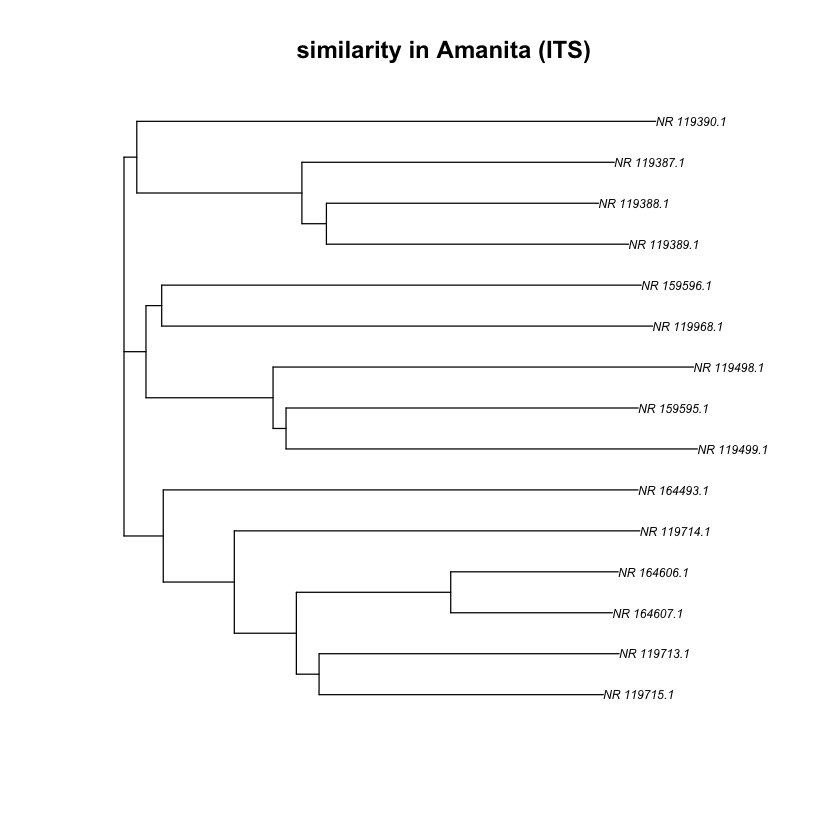

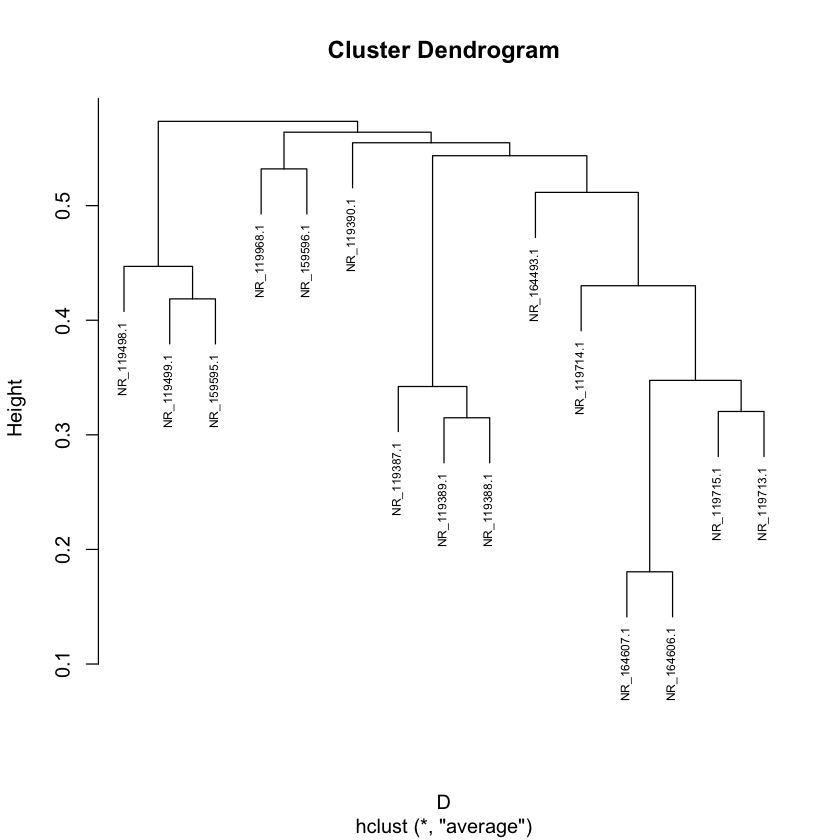

In [8]:
# ~~~~~~~~~~~~~~~ ~~~~~~~~~~~~~~~~~~~Base R plots ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plot(tre, cex = 0.6)
title("similarity in Amanita (ITS)")


# or 
h_cluster <- hclust(D, method = "average", members = NULL) # method = average is used for UPGMA, members can be equal to NULL or a vector with a length of size D
plot(h_cluster, cex = 0.6)

Warning message in scaleY(as.phylo(model), res, yscale, layout, ...):
"yscale is not available...
"
Average angle change [1] 0.0419104916110862

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_segment()`)."


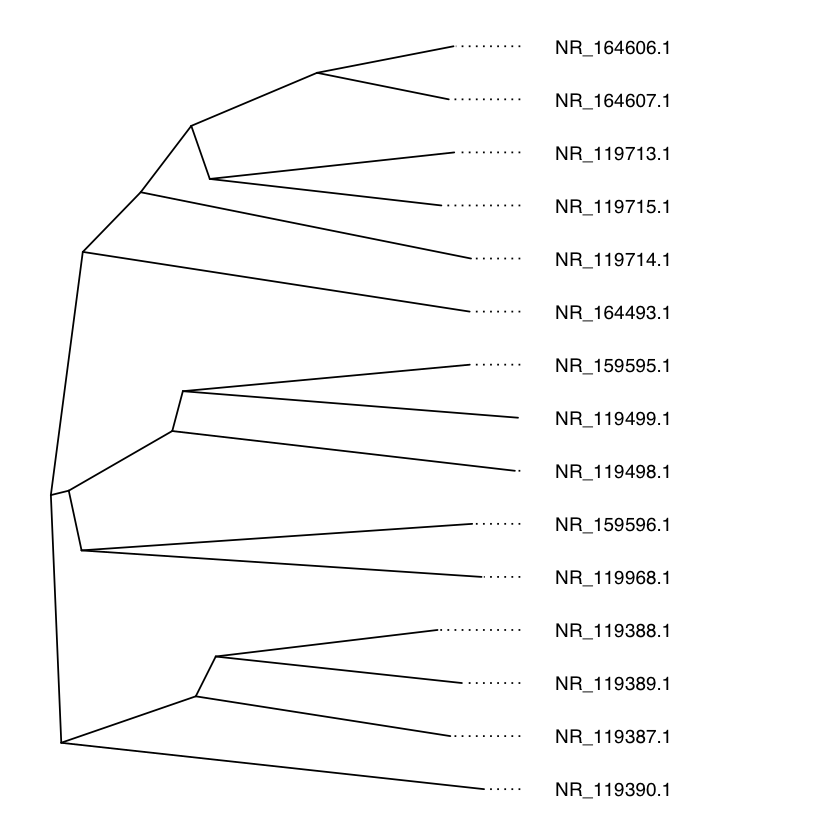

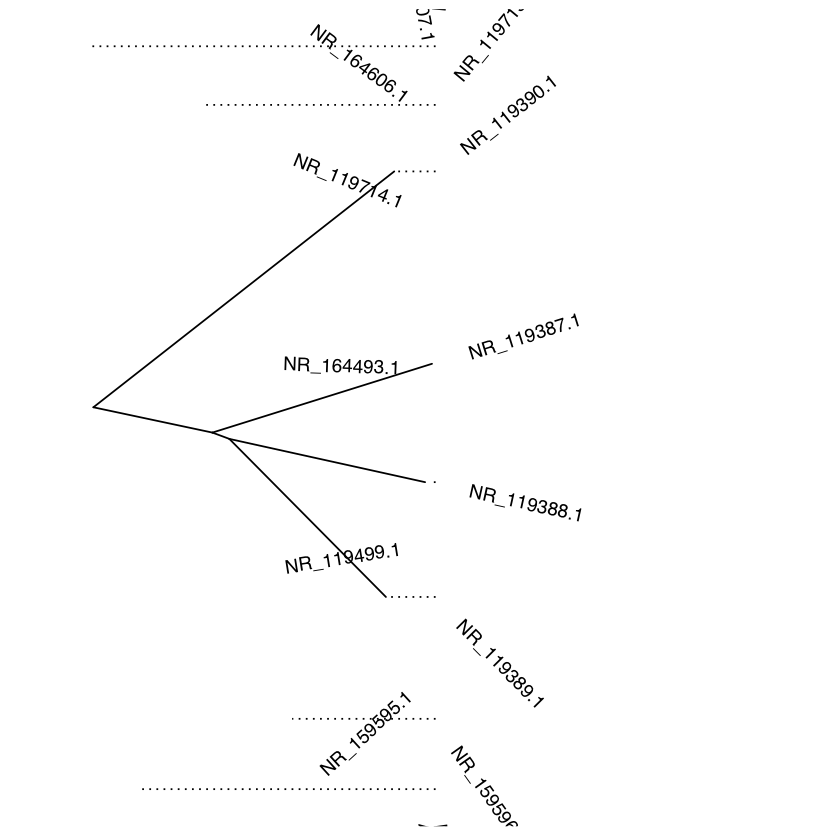

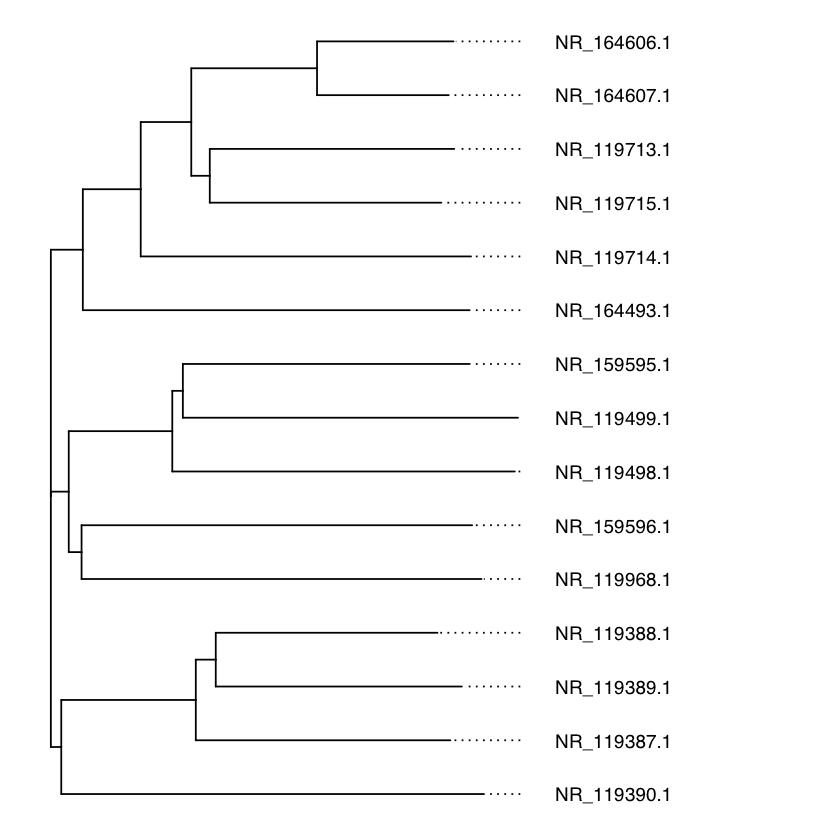

In [9]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~ Tree Plotting in ggtree ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
# you can fan it out 
ggtree(tre, yscale = "NA") +
  geom_tiplab(hjust = -0.3, size = 4, align = TRUE) +
  xlim(0, 0.5) 

# or whatever this thing does???
ggtree(tre, layout = "daylight") +
  geom_tiplab(hjust = -0.3, size = 4, align = TRUE) +
  xlim(0, 0.5) 

# plot a basic tree
ggtree(tre) + 
  geom_tiplab(hjust = -0.3, size = 4, align = TRUE) +
  xlim(0, 0.5)

Warning message:
"The following aesthetics were dropped during statistical transformation: node
and parent.
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: node
and parent.
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: node
and parent.
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation: node
and 

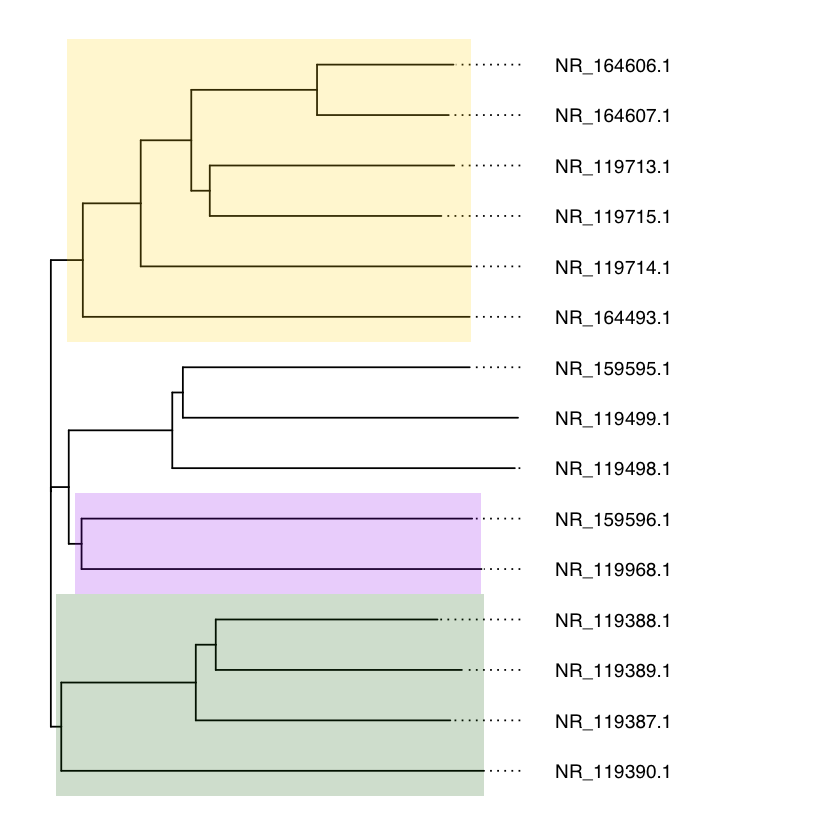

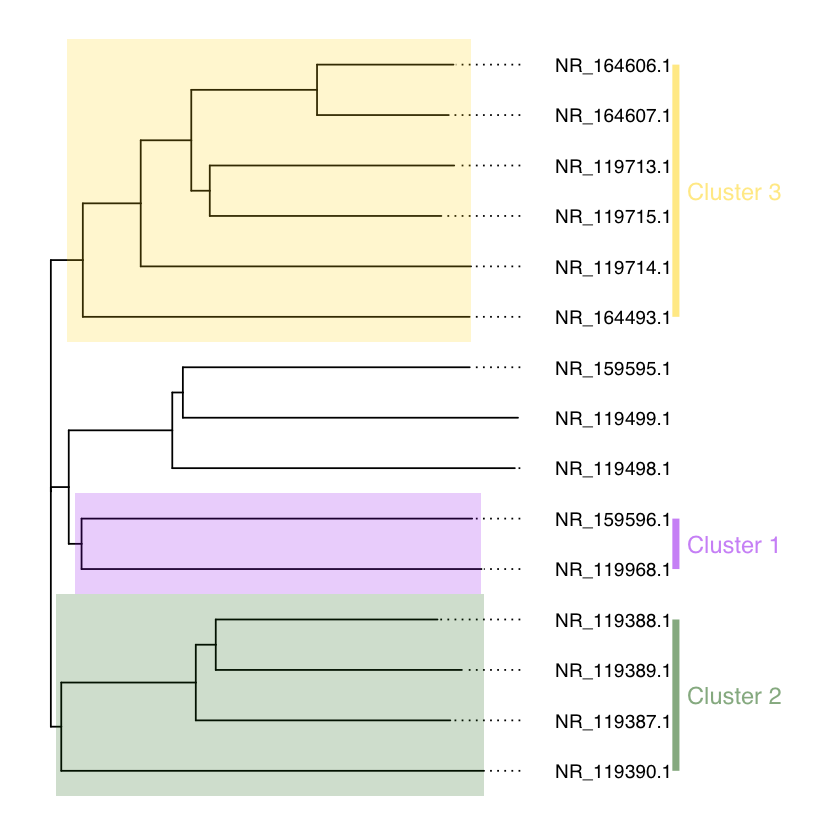

In [10]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~ Customize your trees ~~~~~~~~~~~~~~~~~~~~~~~~
# plot using ggtree and highlight clusters
# change the node values for your own data
ggtree(tre) + 
  geom_tiplab(hjust = -0.3, size = 4, align = TRUE) + 
  geom_hilight(node = 19, fill = "purple", alpha = 0.2) + 
  geom_hilight(node = 17, fill = "dark green", alpha = 0.2) +
  geom_hilight(node = 20, fill = "gold", alpha = 0.2) +
  xlim(0, 0.5) 

# highlight clusters and add a vertical line to group clusters
# change the node values for your own data
ggtree(tre) + 
  geom_tiplab(hjust = -0.3, size =4, align = TRUE) + 
  geom_hilight(node = 19, fill = "purple", alpha = 0.2) + 
  geom_hilight(node = 17, fill = "dark green", alpha = 0.2) +
  geom_hilight(node = 20, fill ="gold", alpha = 0.2) +
  geom_cladelabel(node = 19, label =" Cluster 1", 
                  color = "purple", offset = .1, barsize = 2,
                  fontsize = 5, align=TRUE, alpha = 0.5) + 
  geom_cladelabel(node = 17, label =" Cluster 2", 
                  color = "dark green", offset = .1, barsize = 2,
                  fontsize = 5, align=TRUE, alpha = 0.5) + 
  geom_cladelabel(node = 20, label = " Cluster 3", 
                  color = "gold", offset = .1, barsize = 2,
                  fontsize = 5, align = TRUE, alpha = 0.5) + 
  xlim(0, 0.5) 

In [11]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~ Plot the allignment with the tree ~~~~~~~~~~~~~~~~~

# lets plot the alignment with the tree, to do this we first have to
# match the names to the tip labels
# set our tree into a new name
tre.new <- tre
# change tip labels to full alignment names
tre.new $ tip.label <- aligned@ranges@NAMES

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


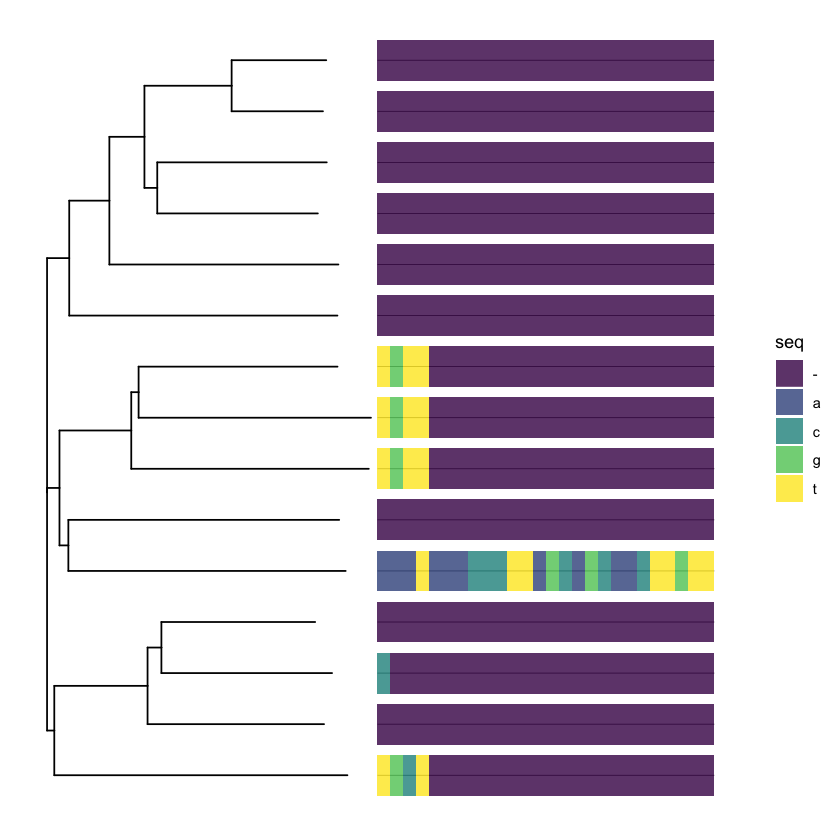

In [12]:
# plot the alignment 
msaplot(p = ggtree(tre.new), fasta = "new_aligned.fasta", 
        window = c(150, 175)) +
  scale_fill_viridis_d(alpha = 0.8)